## Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Read Data

In [3]:
df = pd.read_csv("Data/student-mat.csv",sep=";")

## EDA

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.shape

(395, 33)

In [5]:
df = df[["age","absences","freetime","Medu","G1","G2","G3"]]

In [6]:
df.head()

,age,absences,freetime,Medu,G1,G2,G3
0,18,6,3,4,5,6,6
1,17,4,3,1,5,5,6
2,15,10,3,1,7,8,10
3,15,2,2,4,15,14,15
4,16,4,3,3,6,10,10


In [7]:
df.describe()

,age,absences,freetime,Medu,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,5.708861,3.235443,2.749367,10.908861,10.713924,10.415190
std,1.276043,8.003096,0.998862,1.094735,3.319195,3.761505,4.581443
min,15.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,0.000000,3.000000,2.000000,8.000000,9.000000,8.000000
50%,17.000000,4.000000,3.000000,3.000000,11.000000,11.000000,11.000000
75%,18.000000,8.000000,4.000000,4.000000,13.000000,13.000000,14.000000
max,22.000000,75.000000,5.000000,4.000000,19.000000,19.000000,20.000000


In [ ]:
df.dtypes

age         int64
absences    int64
freetime    int64
Medu        int64
G1          int64
G2          int64
G3          int64
dtype: object

In [ ]:
df.isnull().sum()

age         0
absences    0
freetime    0
Medu        0
G1          0
G2          0
G3          0
dtype: int64

In [ ]:
predict = "G3"
X = np.array(df.drop([predict],1))
Y = np.array (df[predict])

<ipython-input-11-b58325e9bc7d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop([predict],1))


In [ ]:
X

array([[18,  6,  3,  4,  5,  6],
       [17,  4,  3,  1,  5,  5],
       [15, 10,  3,  1,  7,  8],
       ...,
       [21,  3,  5,  1, 10,  8],
       [18,  0,  4,  3, 11, 12],
       [19,  5,  2,  1,  8,  9]])

In [ ]:
Y

array([ 6,  6, 10, 15, 10, 15, 11,  6, 19, 15,  9, 12, 14, 11, 16, 14, 14,
       10,  5, 10, 15, 15, 16, 12,  8,  8, 11, 15, 11, 11, 12, 17, 16, 12,
       15,  6, 18, 15, 11, 13, 11, 12, 18, 11,  9,  6, 11, 20, 14,  7, 13,
       13, 10, 11, 13, 10, 15, 15,  9, 16, 11, 11,  9,  9, 10, 15, 12,  6,
        8, 16, 15, 10,  5, 14, 11, 10, 10, 11, 10,  5, 12, 11,  6, 15, 10,
        8,  6, 14, 10,  7,  8, 18,  6, 10, 14, 10, 15, 10, 14,  8,  5, 17,
       14,  6, 18, 11,  8, 18, 13, 16, 19, 10, 13, 19,  9, 16, 14, 13,  8,
       13, 15, 15, 13, 13,  8, 12, 11,  9,  0, 18,  0,  0, 12, 11,  0,  0,
        0,  0, 12, 15,  0,  9, 11, 13,  0, 11,  0, 11,  0, 10,  0, 14, 10,
        0, 12,  8, 13, 10, 15, 12,  0,  7,  0, 10,  7, 12, 10, 16,  0, 14,
        0, 16, 10,  0,  9,  9, 11,  6,  9, 11,  8, 12, 17,  8, 12, 11, 11,
       15,  9, 10, 13,  9,  8, 10, 14, 15, 16, 10, 18, 10, 16, 10, 10,  6,
       11,  9,  7, 13, 10,  7,  8, 13, 14,  8, 10, 15,  4,  8,  8, 10,  6,
        0, 17, 13, 14,  7

In [ ]:
X.shape

(395, 6)

In [ ]:
Y.shape

(395,)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [ ]:
X_train.shape

(355, 6)

In [ ]:
X_test.shape

(40, 6)

In [ ]:
X_train

array([[15,  2,  3,  3, 12, 12],
       [17,  0,  2,  1, 12, 11],
       [17,  0,  3,  2,  9,  8],
       ...,
       [15,  2,  4,  4, 10, 10],
       [18,  8,  4,  2, 14, 12],
       [15, 10,  4,  3,  7,  6]])

In [ ]:
X_test

array([[18,  9,  4,  4, 15, 13],
       [16,  6,  3,  2, 10, 10],
       [15,  0,  4,  2,  8,  8],
       [18,  0,  4,  3, 11, 12],
       [17,  0,  4,  2, 10,  9],
       [18,  2,  3,  2, 10,  9],
       [16, 10,  4,  4, 15, 15],
       [18,  0,  3,  3,  7,  0],
       [19, 12,  4,  3, 14, 13],
       [17,  0,  3,  2, 14, 15],
       [17,  6,  3,  3,  8,  7],
       [16,  4,  3,  3,  8, 10],
       [15,  0,  5,  3, 13, 13],
       [18,  0,  1,  1,  6,  5],
       [16,  6,  3,  1,  9,  9],
       [16, 18,  4,  4, 14, 11],
       [16,  6,  4,  4, 10, 11],
       [17,  4,  4,  2, 14, 13],
       [16,  2,  3,  2, 16, 16],
       [18, 10,  4,  4, 10,  8],
       [17,  0,  4,  4, 13, 15],
       [17,  2,  3,  2, 12, 11],
       [17,  0,  3,  4, 15, 12],
       [16, 10,  3,  4, 11, 12],
       [15,  4,  3,  2, 11, 10],
       [18,  8,  2,  4, 10, 11],
       [18,  0,  3,  4, 14, 13],
       [17,  2,  4,  1,  7,  9],
       [19,  8,  4,  1,  8,  7],
       [18,  2,  3,  4,  8,  8],
       [17

In [ ]:
X_test[0]

array([18,  9,  4,  4, 15, 13])

## Model Development

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)
acc = model.score (X_test,Y_test)
print(acc)

NameError: ignored

In [ ]:
model2 = linear_model.Ridge()
model2.fit(X_train,Y_train)
acc2 = model2.score(X_test,Y_test)
print(acc2)

NameError: ignored

In [ ]:
model3 = linear_model.RidgeCV()
model3.fit(X_train,Y_train)
acc3 = model2.score(X_test,Y_test)
print(acc3)

In [ ]:
model4 = linear_model.SGDRegressor(loss='huber',max_iter=100, alpha=0.001)
model4.fit(X_train,Y_train)
acc4 = model4.score(X_test,Y_test)
print(acc4)

NameError: ignored

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
X_test[0]

In [ ]:
Y_test[0]

In [ ]:
model.predict([X_test[0]])

NameError: ignored

In [ ]:
y = -0.17815344 * 21 +  0.05380807 * 3 + 0.12666735 * 5 + 0.02525944 * 1 + 0.15941509 * 10 + 0.97960158 * 8 + 0.39344028837221856

In [ ]:
y = -0.17815344 * 21 +  0.05380807 * 3 + 0.12666735 * 5 + 0.02525944 * 1 + 0.15941509 * 10 + 0.97960158 * 8 + 0.39344028837221856

In [ ]:
y

In [ ]:
model2.coef_

In [ ]:
model2.intercept_

In [ ]:
model3.coef_

In [ ]:
model3.intercept_

In [ ]:
model4.coef_

In [ ]:
model4.intercept_

In [ ]:
predicted = model.predict(X_test)
for i in range (len(predicted)):
 print(f"Real: {Y_test[i]}, Predicted: {predicted[i]}")
 print("*******************************************8")

## Save & Load the Model

### joblib - Save the Model

In [ ]:
import joblib

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

0.7887520617733067


### Streamlit - Load the Model and Build a Web App for our ML Project


In [ ]:
# Streamlit is one of the easiest ways to build a front end web app for
# our machine learning projects with simple python scripts.
# We load the model and pass the features entered by the end user
# back to our model based on which all the processing is done
# on the back end and finally we send the result/prediction back to the web app.

# Step 0: pip install streamlit. pip install -U scikit-learn. pip install joblib. pip install numpy. pip install pandas. (Installation is done through the VS Code terminal.)
# Step 1: Save this script as a python file ‘PredictMathGradeScore.py’ in the root folder.
# Step 2: Download the 'finalized_model.sav' from your notebook and place it in the root folder.
# Step 3: Open the terminal by navigating as ‘Terminal -> ‘ New Terminal in the VS Code navigator.
# Step 4: Once the VS Code terminal pops up, just write ‘streamlit run PredictMathGradeScore.py’ and press enter.

import streamlit as st
import pandas as pd
import numpy as np
import joblib as jb
import sklearn as sk


# load the model from disk
filename = 'finalized_model.sav'
loaded_model = jb.load(filename)

# Creating the Titles and Header
st.title("Predicting the Grade of Math Course")
st.header("Predicting a Student's Math Score based on Her Characteristics.")

def load_data():
    df = pd.DataFrame({'Medu' : ['None' ,'Primary Education (4th grade)' ,'5th to 9th Grade' ,'Secondary Education','Higher Education']})
    return df
df = load_data()

age = st.slider("What is your age?", 6, 22)
absences = st.slider("Number of Absences", 0, 75)
freetime = st.slider("Number of Free Time", 1, 5)
MotherEducation = st.selectbox("What Is Your Mother Education?", df['Medu'].unique())
MathGrade1 = st.slider("What is your Math Score 1?", 0, 20)
MathGrade2 = st.slider("What is your Math Score 2?", 0, 20)

# converting text input to numeric to get back predictions from backend model.
if MotherEducation == 'None':
    MotherEducation = 0
elif MotherEducation == 'Primary Education (4th grade)':
    MotherEducation = 1
elif MotherEducation == '5th to 9th Grade':
    MotherEducation = 2
elif MotherEducation == 'Secondary Education':
    MotherEducation = 3
else:
    MotherEducation = 4

# store the inputs
features = [age, absences, freetime, MotherEducation, MathGrade1, MathGrade2]
# convert user inputs into an array fr the model

int_features = [int(x) for x in features]
final_features = [np.array(int_features)]

# when the submit button is pressed
if st.button('Predict'):
    prediction =  loaded_model.predict(final_features)
    st.success(f'Your Math Score would be: {round(prediction[0],2)}')
    st.balloons()


ModuleNotFoundError: ignored

### Pickle - Save the Model [another Method]

In [ ]:
import pickle

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.8633398142251741


### Correlation

In [ ]:
df.corr()

<ipython-input-77-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


<Axes: >

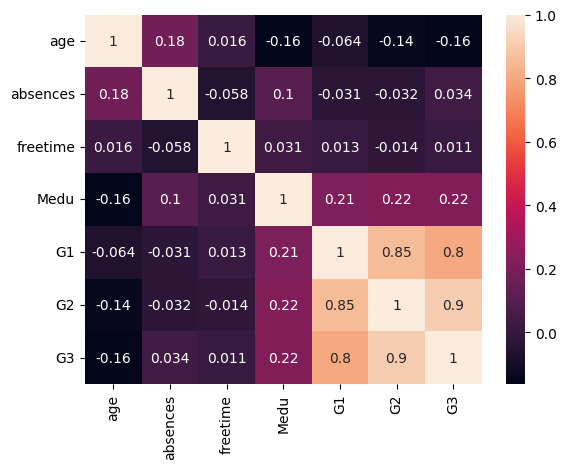

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df = pd.read_csv("student-mat.csv",sep=";")
df = df[["G1","G2","G3"]]

In [ ]:
df = pd.read_csv("student-mat.csv",sep=";")
df = df[["Medu","G1","G2","G3"]]

In [ ]:
df = pd.read_csv("student-mat.csv",sep=";")
df = df[["age","G1","G2","G3"]]

In [ ]:
df = pd.read_csv("student-mat.csv",sep=";")
df = df[["age","Medu","G1","G2","G3"]]

In [ ]:
df = pd.read_csv("student-mat.csv",sep=";")
df = df[["absences","G1","G2","G3"]]

In [ ]:
df = pd.read_csv("student-mat.csv",sep=";")
df = df[["freetime","G1","G2","G3"]]

In [ ]:
df.head()

,freetime,G1,G2,G3
0,3,5,6,6
1,3,5,5,6
2,3,7,8,10
3,2,15,14,15
4,3,6,10,10


In [ ]:
predict = "G3"
X = np.array(df.drop([predict],1))
Y = np.array (df[predict])

<ipython-input-69-b58325e9bc7d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop([predict],1))


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=1211)

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)
acc = model.score (X_test,Y_test)
print(acc)

0.9050605075235477


In [ ]:
model4 = linear_model.SGDRegressor()
model4.fit(X_train,Y_train)
acc4 = model4.score(X_test,Y_test)
print(acc4)

0.8892274726373044


In [ ]:
df = pd.read_csv("student-mat.csv",sep=";")
df.corr()

<ipython-input-73-777638087bc5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [ ]:
import pickle

In [ ]:
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.9050605075235477
